In [36]:
import tensorflow as tf
#una capa unida a la capa siguiente
from tensorflow.keras.models import Sequential
#Varios elementos que componen las RNC
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt

In [7]:
mnist = tf.keras.datasets.mnist

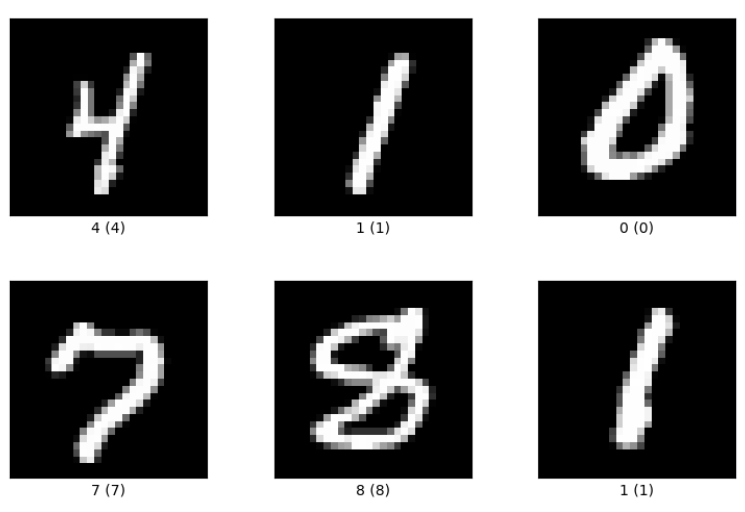

In [8]:
bactch_size=128
epocas=5
image_size=28

In [13]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [14]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [23]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [24]:
x_train.shape

(60000, 28, 28)

In [17]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
x_train=x_train.reshape(x_train.shape[0], image_size, image_size,1)
x_test=x_test.reshape(x_test.shape[0], image_size, image_size,1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
y_train=tf.keras.utils.to_categorical(y_train, 10)
y_test=tf.keras.utils.to_categorical(y_test, 10)


In [28]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [39]:
modelo=Sequential([
    #64 filtros de tamaño 3x3(convolución)
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    #reducción de características
    MaxPooling2D((2, 2)),
    #convolución con 64 filtros de 3x3
    Conv2D(64, (3, 3), activation='relu'),
    #reducción de Características 2x2
    MaxPooling2D((2, 2)),
    #pasarlo a una capa de Vector
    Flatten(),
    #capa totalmente conectada, función de activación relu
    Dense(128, activation='relu'),
    #eliminado de neuronas del 3%, para ayudar a la generalización
    Dropout(0.3),
    #salida en probabilidad de cada número
    Dense(10, activation='softmax')
         ])

In [40]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
modelo.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.8883 - loss: 0.3470
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9825 - loss: 0.0592
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9874 - loss: 0.0420
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.9908 - loss: 0.0289
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.9921 - loss: 0.0254


In [42]:
modelo.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9855 - loss: 0.0403


[0.034084971994161606, 0.9883000254631042]

In [ ]:
historia=modelo.fit(x_train, y_train, epochs=4, batch_size=bactch_size, validation_data=(x_test, y_test))

Epoch 1/4
322/469 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - accuracy: 0.9982 - loss: 0.0061

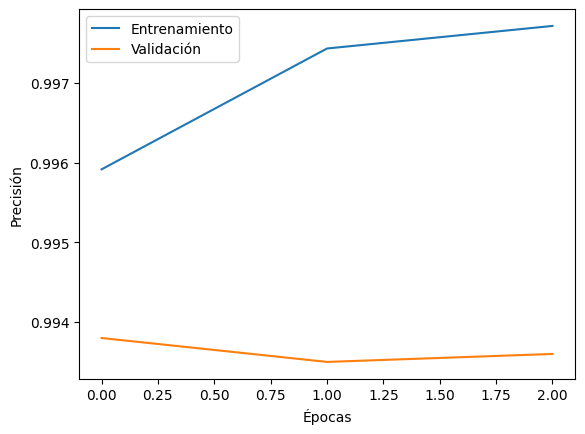

In [46]:
plt.plot(historia.history['accuracy'],label="Entrenamiento")
plt.plot(historia.history['val_accuracy'],label="Validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

In [49]:
ypred_probs=modelo.predict(x_test)
y_predClasse=np.argmax(ypred_probs, axis=1)
y_trueClasse=np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [51]:
mx=confusion_matrix(y_trueClasse, y_predClasse)
mx

array([[ 975,    0,    0,    0,    0,    0,    3,    2,    0,    0],
       [   0, 1133,    0,    1,    0,    0,    0,    1,    0,    0],
       [   1,    0, 1025,    0,    1,    0,    0,    4,    1,    0],
       [   0,    0,    1, 1005,    0,    3,    0,    0,    1,    0],
       [   0,    0,    0,    0,  974,    0,    1,    0,    1,    6],
       [   1,    0,    0,    3,    0,  885,    1,    1,    0,    1],
       [   1,    2,    0,    0,    2,    1,  952,    0,    0,    0],
       [   0,    1,    1,    0,    0,    0,    0, 1023,    1,    2],
       [   1,    0,    1,    2,    1,    0,    0,    2,  965,    2],
       [   0,    0,    0,    0,    3,    3,    0,    3,    1,  999]])

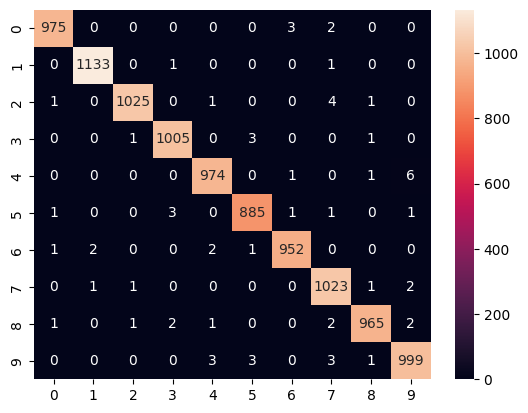

In [52]:
sns.heatmap(mx, annot=True, fmt='d')
plt.show()

In [55]:
print(classification_report(y_trueClasse, y_predClasse))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

